In [2]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
import math
from xhistogram.xarray import histogram
%load_ext autoreload
%autoreload 2
import pei.myfunctions as mf

## Load Data for All Ensembles

In [3]:
# Specify root directory, experiment, filename format
rootdir = '/local/ss23/CESM2_LE/ATM/RCP85/WBT'
filename_2085 = '/b.e21.BSSP370cmip6.f09_g17.LE2-1231.*.clm2.h7.WBT.2085010100-2095010100.nc' 
paths_2085 = rootdir+filename_2085

# Load data from matching files
ds_2085 = xr.open_mfdataset(paths_2085,combine='nested',concat_dim='ensemble')

filename_1980 = '/b.e21.BHISTcmip6.f09_g17.LE2-1231.*.clm2.h7.WBT.1980010100-1990010100.nc' 
paths_1980 = rootdir+filename_1980

# Load data from matching files
ds_1980 = xr.open_mfdataset(paths_1980,combine='nested',concat_dim='ensemble')

## Regional Masks

In [4]:
lon = ds_1980['lon']
lat = ds_1980['lat']

# Dictionary of region masks, represented by lon and lat arrays
masks = {}
masks['Global'] = [lon, lat]
masks['Northern North America'] = [lon.where((190<=lon)&(lon<=310),drop=True).values,lat.where((45<=lat)&(lat<=75),drop=True).values]
masks['Central North America'] = [lon.where((230<=lon)&(lon<=310),drop=True).values,lat.where((35<=lat)&(lat<=45),drop=True).values]
masks['South-Central America'] = [lon.where((230<=lon)&(lon<=330),drop=True).values,lat.where((-30<=lat)&(lat<=35),drop=True).values]
masks['Southern South America'] = [lon.where((270<=lon)&(lon<=330),drop=True).values,lat.where((-60<=lat)&(lat<=-30),drop=True).values]
masks['China'] = [lon.where((75<=lon)&(lon<=135),drop=True).values,lat.where((22.5<=lat)&(lat<=50),drop=True).values]
masks['India'] = [lon.where((68<=lon)&(lon<=90),drop=True).values,lat.where((8<=lat)&(lat<=30),drop=True).values]
masks['Oceania'] = [lon.where((100<=lon)&(lon<=180),drop=True).values,lat.where((-50<=lat)&(lat<=0),drop=True).values]
masks['Russia'] = [lon.where((30<=lon)&(lon<=180),drop=True).values,lat.where((50<=lat)&(lat<=75),drop=True).values]
masks['Scandinavia'] = [lon.where((3<=lon)&(lon<=30),drop=True).values,lat.where((55<=lat)&(lat<=70),drop=True).values]
lon_west = lon.where(lon>=345,drop=True)
lon_east = lon.where(lon<=30,drop=True)
lon_eur = xr.concat((lon_west,lon_east),dim='lon').values
masks['Europe'] = [lon_eur,lat.where((35<=lat)&(lat<=55),drop=True)]
lon_west = lon.where(lon>=355,drop=True)
lon_east = lon.where(lon<=10,drop=True)
lon_france = xr.concat((lon_west,lon_east),dim='lon').values
masks['France'] = [lon_france,lat.where((40<=lat)&(lat<=52),drop=True)]
masks['Middle East'] = [lon.where((25<=lon)&(lon<=60),drop=True).values,lat.where((10<=lat)&(lat<=40),drop=True).values]
masks['Southeast Asia'] = [lon.where((92<=lon)&(lon<=140),drop=True).values,lat.where((-10<=lat)&(lat<=25),drop=True).values]
lon_west = lon.where(lon>=340,drop=True)
lon_east = lon.where(lon<=55,drop=True)
lon_safrica = xr.concat((lon_west,lon_east),dim='lon').values
masks['Southern Africa'] = [lon_safrica,lat.where((-40<=lat)&(lat<=10),drop=True).values]

## Function to Isolate Data for a Region

In [5]:
def slice_region(ds, region):
    ds_region = ds.sel(lon=masks[region][0],lat=masks[region][1])
    return ds_region

## Plot Histogram Function: Daily Max

In [26]:
def hist_plot(region):
    fig, ax = plt.subplots()
    bins = np.linspace(-20,40,60)

    for ds in [ds_1980,ds_2085]:
        region_all = slice_region(ds,region)
        ds_region = region_all.where(region_all['landmask']==1,0)

        # Resample to get daily maximum
        region_daily = ds_region['WBT'].resample(time='1D').max()

        # Area data
        area_region = (ds_region['area']*ds_region['landfrac']).sum(['lon','lat'])
        area_weights = (ds_region['area']*ds_region['landfrac'])/area_region

        # Make histogram
        total_hist = histogram(region_daily,bins=[bins],weights=area_weights,density=True)
        hist_avg = total_hist/50
        hist_avg.plot(ax=ax)

    ax.set_xlabel('WBT (Celsius)')
    ax.set_ylabel('Average Frequency (Days Per Year)')
    ax.set_title(region + ': Annual Distribution of Maximum Daily WBT')
    ax.legend(['1980-1990','2085-2095'])
    fig.savefig(region+'WBTmax')

In [6]:
def hist_plot_mean(region):
    fig, ax = plt.subplots()
    bins = np.linspace(-20,40,60)

    for ds in [ds_1980,ds_2085]:
        region_all = slice_region(ds,region)
        ds_region = region_all.where(region_all['landmask']==1,0)

        # Resample to get daily maximum/mean
        region_daily = ds_region['WBT'].resample(time='1D').mean()

        # Area data
        area_region = (ds_region['area']*ds_region['landfrac']).sum(['lon','lat'])
        area_weights = (ds_region['area']*ds_region['landfrac'])/area_region

        # Make histogram
        total_hist = histogram(region_daily,bins=[bins],weights=area_weights,density=True)
        hist_avg = total_hist/50
        hist_avg.plot(ax=ax)

    ax.set_xlabel('WBT (Celsius)')
    ax.set_ylabel('Average Frequency (Days Per Year)')
    ax.set_title(region + ': Annual Distribution of Mean Daily WBT')
    ax.legend(['1980-1990','2085-2095'])
    fig.savefig(region+'WBTmean')

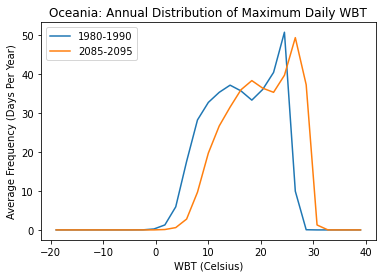

In [12]:
hist_plot('Oceania')

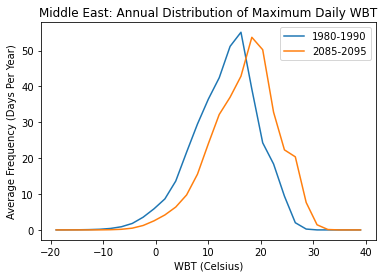

In [13]:
hist_plot('Middle East')

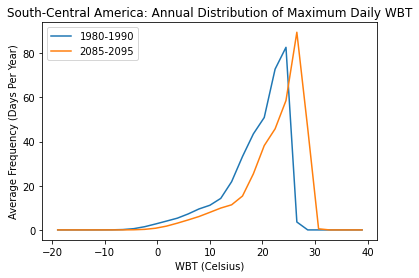

In [14]:
hist_plot('South-Central America')

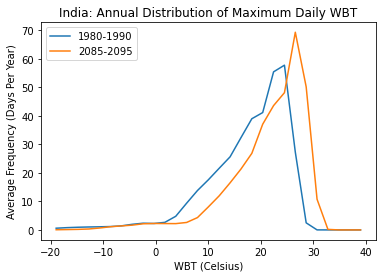

In [15]:
hist_plot('India')

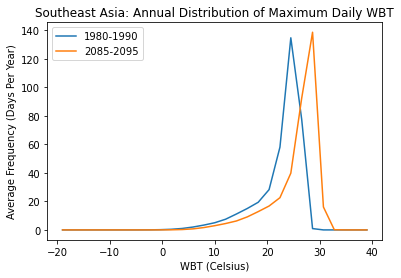

In [17]:
hist_plot('Southeast Asia')

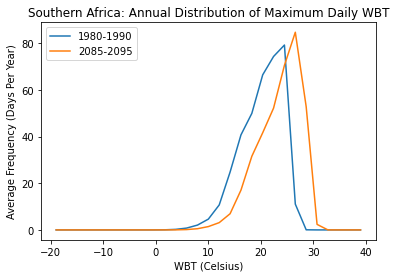

In [19]:
hist_plot('Southern Africa')

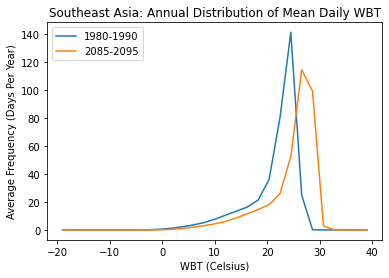

In [15]:
hist_plot_mean('India')

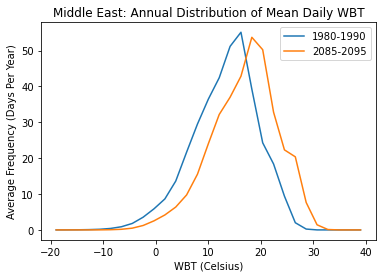

In [16]:
hist_plot_mean('Middle East')

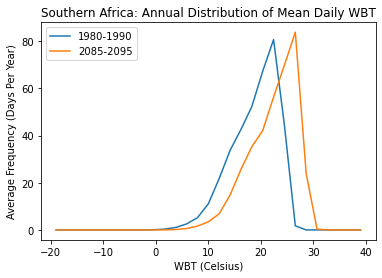

In [17]:
hist_plot_mean('Southern Africa')

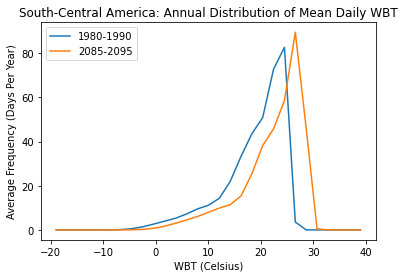

In [18]:
hist_plot_mean('South-Central America')

In [ ]:
hist_plot_mean('Oceania')